# DEEP LEARNING PROJECT-1: MULTI-LAYER PERCEPTRON

IMPORTING REQUIRED LIBRARIES

In [ ]:
import utils
import torch
import torchvision
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

C:\Users\Thirulok Sundar\anaconda3\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\Thirulok Sundar\anaconda3\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


UPLOADING TRAINING DATA

In [ ]:
training_data = torchvision.datasets.ImageFolder(root = 'C:/Users/Thirulok Sundar/Dataset/train', transform = transforms.ToTensor())
test_data = torchvision.datasets.ImageFolder(root = 'C:/Users/Thirulok Sundar/Dataset/test', transform = transforms.ToTensor())

In [ ]:
batch_size = 70
trainloader = torch.utils.data.DataLoader(training_data, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True)

In [ ]:
classes = ('angry', 'disgust', 'fear', 'happy','neutral', 'sad', 'surprise')

SHOWING SOME OF THE IMAGES

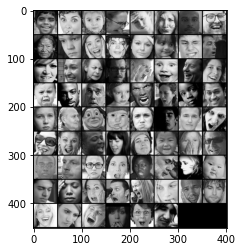

In [ ]:
# functions to show an image

def imshow(img):
    npimg = torch.Tensor.cpu(img).numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
#print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

SELECTING DEVICE

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

DEFINING THE NEURAL NETWORK (MULTILAYER PERCEPTRON)

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(3*48*48, 3000),
            nn.ReLU(),
            nn.Linear(3000, 1500),
            nn.ReLU(),
            nn.Linear(1500, 800),
            nn.ReLU(),
            nn.Linear(800, 200),
            nn.ReLU(),
            nn.Linear(200, 7),
            nn.ReLU()
        )
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        x = self.flatten(x)
        x = self.dropout(x)
        logits = self.linear_relu_stack(x)
        return logits
    
net = NeuralNetwork().to(device)

CHOOSING THE LOSS FUNCTION(CRITERION) AND OPTIMIZER

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.01, momentum = 0.9)

TRAINING THE MODEL

In [ ]:
for epoch in range(90):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
       
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 410 == 409:    # print every 410 mini-batches
            print(f'Epoch:{epoch + 1}    loss: {running_loss / 410:.3f}')
            running_loss = 0.0

print('Finished Training')

Epoch:1    loss: 1.897
Epoch:2    loss: 1.849
Epoch:3    loss: 1.816
Epoch:4    loss: 1.810
Epoch:5    loss: 1.764
Epoch:6    loss: 1.746
Epoch:7    loss: 1.734
Epoch:8    loss: 1.725
Epoch:9    loss: 1.715
Epoch:10    loss: 1.706
Epoch:11    loss: 1.703
Epoch:12    loss: 1.685
Epoch:13    loss: 1.680
Epoch:14    loss: 1.667
Epoch:15    loss: 1.661
Epoch:16    loss: 1.634
Epoch:17    loss: 1.558
Epoch:18    loss: 1.541
Epoch:19    loss: 1.531
Epoch:20    loss: 1.520
Epoch:21    loss: 1.503
Epoch:22    loss: 1.489
Epoch:23    loss: 1.488
Epoch:24    loss: 1.466
Epoch:25    loss: 1.457
Epoch:26    loss: 1.448
Epoch:27    loss: 1.437
Epoch:28    loss: 1.421
Epoch:29    loss: 1.409
Epoch:30    loss: 1.397
Epoch:31    loss: 1.381
Epoch:32    loss: 1.361
Epoch:33    loss: 1.354
Epoch:34    loss: 1.331
Epoch:35    loss: 1.309
Epoch:36    loss: 1.290
Epoch:37    loss: 1.265
Epoch:38    loss: 1.249
Epoch:39    loss: 1.231
Epoch:40    loss: 1.202
Epoch:41    loss: 1.178
Epoch:42    loss: 1.154
E

CHECKING ACCURACY ON TRAINING SET

In [ ]:
correct = 0
total = 0
running_error = 0
num_batches = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        error = utils.get_error( outputs , labels)

        running_error += error.item()

        num_batches+=1

total_error = running_error/num_batches
print( 'error rate on train set =', total_error*100 ,'percent')

print(f'Accuracy of the network on the train images: {100 * correct // total} %')

error rate on train set = 4.716717254216364 percent
Accuracy of the network on the train images: 95 %


In [ ]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: angry is 95.9 %
Accuracy for class: disgust is 94.7 %
Accuracy for class: fear  is 94.2 %
Accuracy for class: happy is 95.1 %
Accuracy for class: neutral is 95.2 %
Accuracy for class: sad   is 95.4 %
Accuracy for class: surprise is 95.8 %


VISUALIZING TEST IMAGES

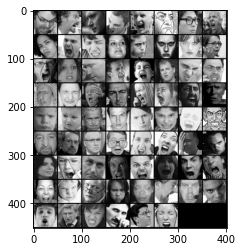

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()
images = images.to(device)
labels = labels.to(device)
# print images
imshow(torchvision.utils.make_grid(images))
#print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(70)))

EVALUATING ON THE TEST SET

In [ ]:
outputs = net(images)
correct = 0
total = 0
running_error = 0
num_batches = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        error = utils.get_error( outputs , labels)

        running_error += error.item()

        num_batches+=1

total_error = running_error/num_batches
print( 'error rate on test set =', total_error*100 ,'percent')

print(f'Accuracy of the network on the test images: {100 * correct // total} %')

error rate on test set = 54.303963207504125 percent
Accuracy of the network on the test images: 45 %


In [ ]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: angry is 37.2 %
Accuracy for class: disgust is 50.5 %
Accuracy for class: fear  is 38.1 %
Accuracy for class: happy is 57.8 %
Accuracy for class: neutral is 38.7 %
Accuracy for class: sad   is 33.9 %
Accuracy for class: surprise is 62.5 %
